In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [28]:
df = pd.read_csv('data.csv')
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%Y-%m-%d %H:%M:%S")

In [29]:
df[["AccX", "AccY", "AccZ"]] = (
    df["Acc"]
    .str.replace(" ", "")
    .str.split(",", expand=True)
    .astype(float)
)

In [30]:
df[['GyroX', 'GyroY', 'GyroZ']] = (
    df['Gyro']
    .str.replace(" ", "")
    .str.split(",", expand=True)
    .astype(float)
)

Plotting both gyroscope and accelerometer data on the same plot.

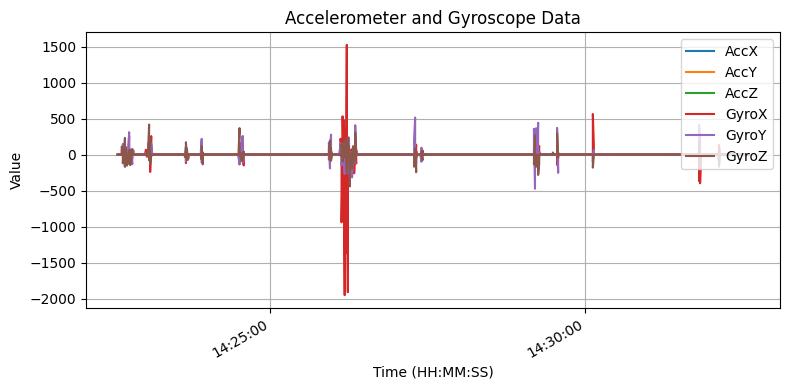

In [ ]:
fig, ax = plt.subplots( figsize=(8, 4) )
df.plot(x='Datetime', y='AccX', ax=ax, label='AccX')
df.plot(x='Datetime', y='AccY', ax=ax, label='AccY')
df.plot(x='Datetime', y='AccZ', ax=ax, label='AccZ')
df.plot(x='Datetime', y='GyroX', ax=ax, label='GyroX')
df.plot(x='Datetime', y='GyroY', ax=ax, label='GyroY')
df.plot(x='Datetime', y='GyroZ', ax=ax, label='GyroZ')

plt.title('Accelerometer and Gyroscope Data')
plt.xlabel('Time (HH:MM:SS)')
plt.ylabel('Value')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()
plt.show()

Accelerometor data and gyroscope data, but now in two different plots. I believe it's more clear to see the data in two different plots as gyroscope values are much larger than accelerometer values.

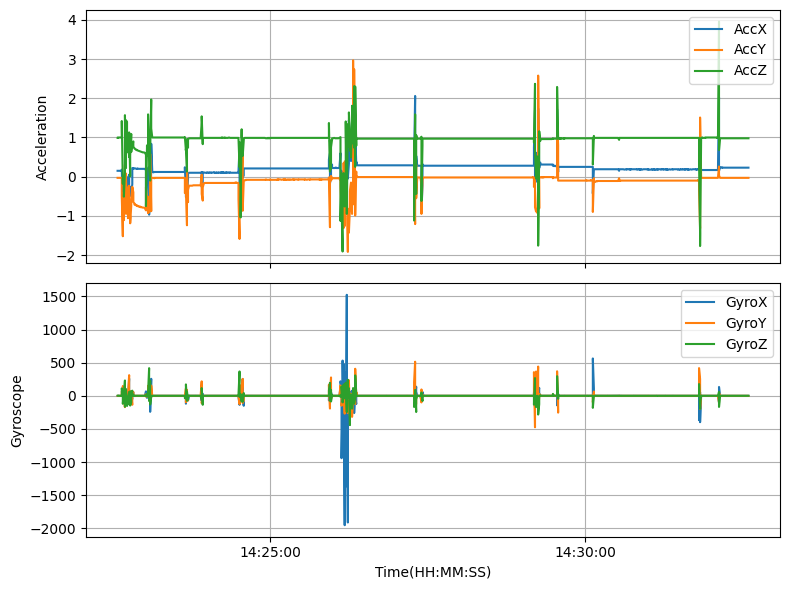

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

ax1.plot(df["Datetime"], df["AccX"], label="AccX")
ax1.plot(df["Datetime"], df["AccY"], label="AccY")
ax1.plot(df["Datetime"], df["AccZ"], label="AccZ")
ax1.set_ylabel("Acceleration")
ax1.legend(loc="upper right")
ax1.grid()

ax2.plot(df["Datetime"], df["GyroX"], label="GyroX")
ax2.plot(df["Datetime"], df["GyroY"], label="GyroY")
ax2.plot(df["Datetime"], df["GyroZ"], label="GyroZ")
ax2.set_xlabel("Time(HH:MM:SS)")
ax2.set_ylabel("Gyroscope")
ax2.legend(loc="upper right")
ax2.grid()

plt.tight_layout()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.show()